In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import zipfile

%matplotlib inline

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context("talk")
sns.set_palette('Set2', 10)

In [4]:
h5_file_path = 'data/gtfs_store.h5'
store = pd.HDFStore(h5_file_path)
local_zip_path = 'data/sample/gtfs.zip' 

with zipfile.ZipFile(local_zip_path) as zf:
    for fn in zf.namelist():
        short = fn.split('.')[0]
        if short not in store:
            store[short] = pd.read_csv(zf.open(fn))
# got this list from running  s.parent_station.value_counts().head(10).index in the loops notebook
store.stops[store.stops.stop_id.isin(['26652', '12961', '10758', '21658', '14679', '3871', '17592', '37412',
       '4967', '15437'])]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,zone_id
3158,3871,43009,מרכזית המפרץ/רציפים בינעירוני,רחוב: עיר: חיפה רציף: קומה:,32.792893,35.034346,1,NaN,310.0
4127,4967,55637,תחנה מרכזית עפולה/רציפים,רחוב: עיר: עפולה רציף: קומה:,32.607821,35.292233,1,NaN,601.0
8451,10758,4170,תחנה מרכזית ירושלים קומה 3/רציפים,רחוב: עיר: ירושלים רציף: קומה:,31.789467,35.203715,1,NaN,110.0
9938,12961,21256,תחנה מרכזית תל אביב קומה 6/רציפים,רחוב:תמח''ת קומה 6 עיר: תל אביב יפו רציף: ...,32.055818,34.779427,1,NaN,210.0
11393,14679,30136,תחנה מרכזית נתניה/רציפים,רחוב:פינסקר עיר: נתניה רציף: קומה:,32.326889,34.858740,1,NaN,231.0
11871,15437,31100,תחנה מרכזית רחובות/רציפים,רחוב:קניון עופר רחובות עיר: רחובות רציף: ק...,31.893459,34.807735,1,NaN,223.0
13657,17592,50093,תחנה מרכזית נהריה/רציפים,רחוב:יאנוש קורצ'אק עיר: נהריה רציף: קומה:,33.005504,35.097344,1,NaN,331.0
16804,21658,33512,תחנה מרכזית ראשון לציון,רחוב: עיר: ראשון לציון רציף: קומה:,31.967759,34.785612,1,NaN,210.0
20226,26652,13907,תחנה מרכזית באר שבע/רציפים,רחוב: עיר: באר שבע רציף: קומה:,31.243017,34.796743,1,NaN,410.0
24727,37412,47962,תחנה מרכזית חדרה/רציפים,רחוב: עיר: חדרה רציף: קומה:,32.435961,34.914023,1,NaN,702.0


# Tidy it up

In [14]:
import partridge as ptg

#service_ids_by_date = ptg.read_service_ids_by_date(local_zip_path)
#service_ids = service_ids_by_date[datetime.date(2017, 12, 21)]

feed = ptg.feed(local_zip_path, view={
    'trips.txt': {
        'route_id': 13429,
    },
})


In [15]:
t = feed.trips
c = feed.calendar
r = feed.routes

In [20]:
t.groupby('service_id').size()

service_id
54188891    176
54188892    177
54188893    176
54188894     49
54188895     19
54188898    168
54188899    167
dtype: int64

## Geo stuff
TODO: Top stops, show them on map

### Buses connecting to a certain stop

In [43]:

feed = ptg.feed(local_zip_path, view={
    'trips.txt': {
        'service_id': service_ids,
        'stop_id': ['13089', '13091', '13540'],
    },
})


In [44]:
len(feed.stops)

27932

In [47]:
feed.stops.groupby('zone_id').size().sort_values(ascending=False)

zone_id
210    3943
110    2521
310    2239
333    1235
231    1232
501    1019
331    1011
221    1003
332     867
233     798
702     787
321     785
223     724
222     703
502     656
801     654
410     597
601     564
232     541
322     541
431     495
131     470
433     451
421     409
121     405
701     388
802     292
602     250
422     246
234     243
901     206
334     201
423     165
432     153
135      93
123      78
902      78
122      66
903      56
133      50
434      42
134      41
dtype: int64

In [23]:
feed.stops[feed.stops.stop_name.str.startswith('מגדל שלום')]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,zone_id
10033,13089,21451,מגדל שלום/אחד העם,רחוב:אחד העם 22 עיר: תל אביב יפו רציף: קומה:,32.063639,34.770359,0,NaN,210
10035,13091,21453,מגדל שלום/הרצל,רחוב:חנה ומרדכי ויסר עיר: תל אביב יפו רציף: ...,32.064027,34.769804,0,NaN,210
10424,13540,25485,מגדל שלום/מונטיפיורי,רחוב:מונטיפיורי 1 עיר: תל אביב יפו רציף: קומה:,32.064693,34.769228,0,NaN,210


In [ ]:
f = feed.stop_times
trip_ids = f[f.stop_id.isin(['13089', '13091', '13540'])].trip_id.unique()
route_ids = feed.trips[feed.trips.trip_id.isin(trip_ids)].route_id.unique()
route_names = feed.routes[feed.routes.route_id.isin(route_ids)].route_short_name.unique()
stop_ids = feed.stop_times[feed.stop_times.trip_id.isin(trip_ids)].stop_id
stop_counts = stop_ids.value_counts()

In [82]:
stops = feed.stops[feed.stops.stop_id.isin(stop_ids.unique())].set_index('stop_id')

In [65]:
route_names

array(['220', '161', '389', '24', '61', '22', '14', '18', '82', '100',
       '150', '38', '138', '23', '249', '149', '147', '47', '48', '168',
       '282', '218', '121'], dtype=object)

In [103]:
stop_counts.head()

13089    877
13115    781
13540    758
13481    691
13141    669
Name: stop_id, dtype: int64

In [99]:
stops = pd.concat((stops, stop_counts), axis=1)

In [109]:
['13089', '13091', '13540']
stops.loc['13089','zone_id'] = 0
stops.loc['13091','zone_id'] = 0
stops.loc['13540','zone_id'] = 0

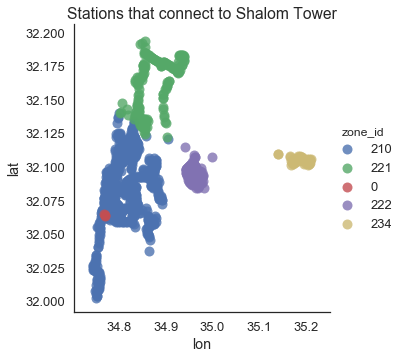

In [110]:
# change zone for the Shalom Tower stations
# Create scatterplot of dataframe
sns.lmplot('stop_lon', # Horizontal axis
           'stop_lat', # Vertical axis
           data=stops, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="zone_id", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Stations that connect to/from Shalom Tower')

# Set x-axis label
plt.xlabel('lon')

# Set y-axis label
plt.ylabel('lat')